In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

from scipy.stats import randint

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

In [2]:
# Import dataframe

mat = pd.read_csv('student-mat.csv', sep=';')
por = pd.read_csv('student-por.csv', sep=';')
both = pd.merge(mat, por, how='outer', suffixes=['_mat','_por'], on=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"])

In [3]:
# Encoding dummy variables

math = pd.get_dummies(mat, drop_first=True)
port = pd.get_dummies(por, drop_first=True)

# **Portuguese Dataset**

In [4]:
# Train & Test samples for Portuguese

Xp = port.drop('G3', axis=1)
yp = port['G3']

Xp_train, Xp_test, yp_train, yp_test = train_test_split(Xp,yp, test_size=0.2, random_state=24)

In [5]:
# Repeated K-Fold cross validator

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=24)

In [6]:
# Linear Regression

linear = LinearRegression()
linear.fit(Xp_train, yp_train)

r2_linear_score = cross_val_score(linear,Xp_train, yp_train,cv=cv, scoring='r2').mean()
print("R2 Cross Validation Score: ", r2_linear_score)

mse_linear_score = abs(cross_val_score(linear,Xp_train, yp_train,cv=cv, scoring='neg_mean_squared_error').mean())
print("MSE Cross Validation Score: ", mse_linear_score)

R2 Cross Validation Score:  0.8281572825499036
MSE Cross Validation Score:  1.7354398467282033


In [7]:
# Ridge

ridge = Ridge()
ridge.fit(Xp_train,yp_train)

r2_ridge_score = cross_val_score(ridge, Xp_train, yp_train, cv=cv, scoring='r2').mean()
print("R2 Cross Validation Score: ", r2_ridge_score)

mse_ridge_score = abs(cross_val_score(ridge, Xp_train, yp_train, cv=cv, scoring='neg_mean_squared_error').mean())
print("MSE Cross Validation Score: ", mse_ridge_score)

R2 Cross Validation Score:  0.8288077855634158
MSE Cross Validation Score:  1.730412295686312


In [8]:
# Lasso

lasso = Lasso()
lasso.fit(Xp_train,yp_train)

r2_lasso_score = cross_val_score(lasso, Xp_train, yp_train, cv=cv, scoring='r2').mean()
print("R2 Cross Validation Score: ", r2_lasso_score)

mse_lasso_score = abs(cross_val_score(lasso, Xp_train, yp_train, cv=cv, scoring='neg_mean_squared_error').mean())
print("MSE Cross Validation Score: ", mse_lasso_score)

R2 Cross Validation Score:  0.8316797568325994
MSE Cross Validation Score:  1.751285445731496


In [9]:
# Support Vector Machines based Regression

steps = [('scaler', StandardScaler()), ('SVR',SVR())]
svr_pipeline = Pipeline(steps)
svr_pipeline.fit(Xp_train, yp_train)

r2_svr_score = cross_val_score(svr_pipeline,Xp_train, yp_train,cv=cv, scoring='r2').mean()
print("R2 Cross Validation Score: ", r2_svr_score)

mse_svr_score = abs(cross_val_score(svr_pipeline,Xp_train, yp_train,cv=cv, scoring='neg_mean_squared_error').mean())
print("MSE Cross Validation Score: ", mse_svr_score)

R2 Cross Validation Score:  0.7049884133849651
MSE Cross Validation Score:  3.0708528817117373


In [10]:
# Decision Tree Regressor

dtr = DecisionTreeRegressor()
dtr.fit(Xp_train, yp_train)

r2_decision_tree_score = cross_val_score(dtr,Xp_train, yp_train,cv=cv, scoring='r2').mean()
print("R2 Cross Validation Score: ",r2_decision_tree_score)

mse_decision_tree_score = abs(cross_val_score(dtr,Xp_train, yp_train,cv=cv, scoring='neg_mean_squared_error').mean())
print("MSE Cross Validation Score: ",mse_decision_tree_score)

R2 Cross Validation Score:  0.6934960863261704
MSE Cross Validation Score:  3.0502890899949717


In [11]:
# Random Forest Regression

rfr = RandomForestRegressor()
rfr.fit(Xp_train, yp_train)

r2_random_forest_score = cross_val_score(rfr,Xp_train, yp_train,cv=cv, scoring='r2').mean()
print("R2 Cross Validation Score: ",r2_random_forest_score)

mse_random_forest_score = abs(cross_val_score(rfr,Xp_train, yp_train,cv=cv, scoring='neg_mean_squared_error').mean())
print("MSE Cross Validation Score: ",mse_random_forest_score)

R2 Cross Validation Score:  0.8310060174259526
MSE Cross Validation Score:  1.6479012820512824


In [12]:
# Gradient Boosting Regression

gradient = GradientBoostingRegressor()
gradient.fit(Xp_train, yp_train)

r2_gradient_boosting_score = cross_val_score(gradient,Xp_train, yp_train,cv=cv, scoring='r2').mean()
print("R2 Cross Validation Score: ",r2_gradient_boosting_score)

mse_gradient_boosting_score = abs(cross_val_score(gradient,Xp_train, yp_train,cv=cv, scoring='neg_mean_squared_error').mean())
print("MSE Cross Validation Score: ",mse_gradient_boosting_score)

R2 Cross Validation Score:  0.8132734603114787
MSE Cross Validation Score:  1.850849064045144


In [13]:
# XGBoost

xgboost = XGBRegressor()
xgboost.fit(Xp_train, yp_train)

r2_xgboost_score = cross_val_score(xgboost,Xp_train, yp_train,cv=cv, scoring='r2').mean()
print("R2 Cross Validation Score: ",r2_xgboost_score)

mse_xgboost_score = abs(cross_val_score(xgboost,Xp_train, yp_train,cv=cv, scoring='neg_mean_squared_error').mean())
print("MSE Cross Validation Score: ",mse_xgboost_score)

R2 Cross Validation Score:  0.8053402411205154
MSE Cross Validation Score:  1.899229456653848


In [14]:
# Lightgbm

light = LGBMRegressor()
light.fit(Xp_train, yp_train)

r2_lightgbm_score = cross_val_score(light,Xp_train, yp_train,cv=cv, scoring='r2').mean()
print("R2 Cross Validation Score: ",r2_lightgbm_score)

mse_lightgbm_score = abs(cross_val_score(light,Xp_train, yp_train,cv=cv, scoring='neg_mean_squared_error').mean())
print("MSE Cross Validation Score: ",mse_lightgbm_score)

R2 Cross Validation Score:  0.8194704082422626
MSE Cross Validation Score:  1.7919546452191517


# **Model Evaluation**

In [15]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

In [16]:
name = ['Linear Regression', 'Ridge', 'Lasso', 'Support Vector Machines', 'Decision Tree',
    'Random Forest','Gradient Boosting', 'XGBoost', 'Lightgbm']
# R2
r2_cv_score = [r2_linear_score, r2_ridge_score, r2_lasso_score, r2_svr_score, r2_decision_tree_score, r2_random_forest_score,
    r2_gradient_boosting_score, r2_xgboost_score, r2_lightgbm_score]

r2_cv_score_round = [round(score, 4) for score in r2_cv_score]

# MSE

mse_cv_score = [mse_linear_score, mse_ridge_score, mse_lasso_score, mse_svr_score, mse_decision_tree_score, mse_random_forest_score,
   mse_gradient_boosting_score, mse_xgboost_score, mse_lightgbm_score]

mse_cv_score_round = [round(score, 4) for score in mse_cv_score]

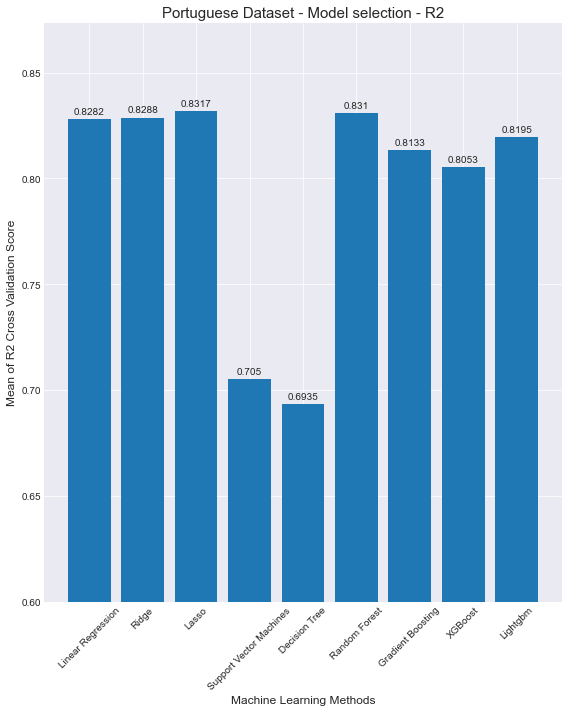

In [17]:
# R2 Cross Validation Score

plt.style.use('seaborn-darkgrid')

fig, ax = plt.subplots(figsize=(8,10))

r2_score_graph = ax.bar(name, r2_cv_score_round)
autolabel(r2_score_graph)

ax.set_ylim(bottom=0.6)   
ax.set_ylabel("Mean of R2 Cross Validation Score", size=12)
ax.set_xlabel('Machine Learning Methods', size=12)
ax.set_title("Portuguese Dataset - Model selection - R2", size = 15)
ax.set_xticks(name)
ax.set_xticklabels(name, rotation=45)

plt.tight_layout()
plt.savefig("Portuguese Dataset - Model selection - R2.png")
plt.show()

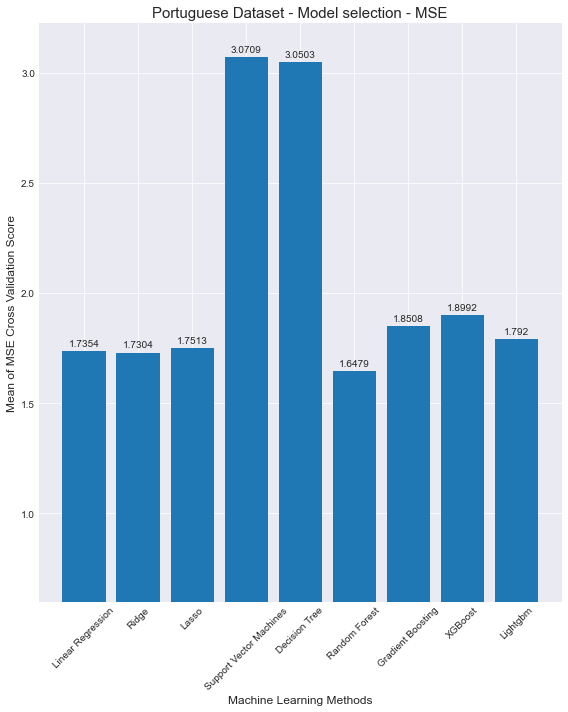

In [18]:
# MSE Cross Validation Score

fig, ax = plt.subplots(figsize=(8,10))

mse_score_graph = ax.bar(name, mse_cv_score_round)
autolabel(mse_score_graph)

ax.set_ylim(bottom=0.6)   
ax.set_ylabel("Mean of MSE Cross Validation Score", size=12)
ax.set_xlabel('Machine Learning Methods', size=12)
ax.set_title("Portuguese Dataset - Model selection - MSE", size = 15)
ax.set_xticks(name)
ax.set_xticklabels(name, rotation=45)

plt.tight_layout()
plt.savefig("Portuguese Dataset - Model selection - MSE.png")
plt.show()